In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pl

In [8]:
df = pd.DataFrame({
    'contract no':np.random.randint(111111,999999,(10000)),
    'stock_symbol':np.random.choice([''.join(np.random.choice(list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'),5)) for i in range(20)],10000),
    'buyer_broker':np.random.randint(1,20,10000),
    'seller_broker':np.random.randint(1,20,10000),
    'quantity':np.random.randint(50,1000,10000),
    'rate':np.random.randint(100,10000,10000),
    'date':[f"20{k}-{i}-{j}" for k in range(10,50) for i in range(1,11) for j in range(1,29)][:10000]
}).reset_index().rename(columns={'index':'sn'})

In [9]:
df['amount']= df['quantity']*df['rate']

In [10]:
df.head(20)

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
0,0,280899,RGUDH,14,11,502,8924,2010-1-1,4479848
1,1,222892,SHLLC,10,1,632,324,2010-1-2,204768
2,2,987749,NIMBS,19,9,745,1349,2010-1-3,1005005
3,3,296858,HVKBO,17,5,852,359,2010-1-4,305868
4,4,644042,BHMTC,16,19,240,4969,2010-1-5,1192560
5,5,297985,POEVB,4,4,601,8021,2010-1-6,4820621
6,6,622041,BHMTC,8,7,658,3986,2010-1-7,2622788
7,7,446064,SHLLC,2,3,169,7417,2010-1-8,1253473
8,8,748705,HVKBO,18,16,392,7726,2010-1-9,3028592
9,9,496987,TPEBV,17,3,283,6826,2010-1-10,1931758


In [11]:
a=df.groupby('buyer_broker')['quantity','amount'].sum().reset_index().rename(columns ={'buyer_broker':'broker'})
b =df.groupby('seller_broker')['quantity','amount'].sum().reset_index().rename(columns ={'seller_broker':'broker'})
# c=pd.concat([a,b])
c=pd.merge(a,b,on = 'broker')
c

<ipython-input-11-809fe3408c1b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  a=df.groupby('buyer_broker')['quantity','amount'].sum().reset_index().rename(columns ={'buyer_broker':'broker'})
<ipython-input-11-809fe3408c1b>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  b =df.groupby('seller_broker')['quantity','amount'].sum().reset_index().rename(columns ={'seller_broker':'broker'})


,broker,quantity_x,amount_x,quantity_y,amount_y
0,1,277206,1417129042,273264,1400751672
1,2,273689,1351450346,256739,1258981533
2,3,273146,1419153754,270889,1402840018
3,4,251051,1261501575,285174,1462774877
4,5,302515,1516602873,289003,1486670015
5,6,279771,1379017492,267561,1330347417
6,7,275333,1349258219,272717,1395073099
7,8,266925,1334813812,279681,1302764292
8,9,248357,1285367825,264138,1299670385
9,10,285061,1382421003,275152,1389658353


In [12]:
c['Amount']=np.array(c['amount_x']+c['amount_y'],dtype='str')
c.sort_values(by = 'Amount')

,broker,quantity_x,amount_x,quantity_y,amount_y,Amount
4,5,302515,1516602873,289003,1486670015,-1291694408
14,15,270935,1452509576,275435,1450369306,-1392088414
2,3,273146,1419153754,270889,1402840018,-1472973524
0,1,277206,1417129042,273264,1400751672,-1477086582
17,18,269651,1457720624,268016,1338229995,-1499016677
9,10,285061,1382421003,275152,1389658353,-1522887940
13,14,277267,1386254041,270083,1376001575,-1532711680
18,19,282444,1432195314,276848,1323914749,-1538857233
11,12,280293,1455329941,258359,1292977419,-1546659936
6,7,275333,1349258219,272717,1395073099,-1550635978


In [13]:
df.groupby('seller_broker')['quantity'].sum().sort_values(ascending=False)

seller_broker
5     289003
4     285174
8     279681
16    278840
19    276848
15    275435
10    275152
1     273264
7     272717
3     270889
17    270557
13    270283
14    270083
18    268016
6     267561
11    265043
9     264138
12    258359
2     256739
Name: quantity, dtype: int32

In [14]:
df.groupby('buyer_broker')['amount'].sum().sort_values(ascending=False)

buyer_broker
5     1516602873
18    1457720624
12    1455329941
15    1452509576
19    1432195314
3     1419153754
1     1417129042
14    1386254041
10    1382421003
6     1379017492
17    1365540355
2     1351450346
7     1349258219
8     1334813812
11    1287610907
9     1285367825
13    1280689692
4     1261501575
16    1238214250
Name: amount, dtype: int32

In [15]:
df['buyer_broker'].unique()

array([14, 10, 19, 17, 16,  4,  8,  2, 18,  3, 13,  1, 11, 12,  9,  7,  5,
        6, 15])

In [16]:
df

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
0,0,280899,RGUDH,14,11,502,8924,2010-1-1,4479848
1,1,222892,SHLLC,10,1,632,324,2010-1-2,204768
2,2,987749,NIMBS,19,9,745,1349,2010-1-3,1005005
3,3,296858,HVKBO,17,5,852,359,2010-1-4,305868
4,4,644042,BHMTC,16,19,240,4969,2010-1-5,1192560
...,...,...,...,...,...,...,...,...,...
9995,9995,989827,SHLLC,2,8,645,2117,2045-7-28,1365465
9996,9996,870074,QGIJX,16,7,122,2650,2045-8-1,323300
9997,9997,348085,SHLLC,8,10,550,5230,2045-8-2,2876500
9998,9998,181724,EURVH,3,13,598,6576,2045-8-3,3932448


In [17]:
df["amount"] = df["quantity"]* df["rate"]
df['date']=pd.to_datetime(df['date'])

In [18]:
df.head()

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
0,0,280899,RGUDH,14,11,502,8924,2010-01-01,4479848
1,1,222892,SHLLC,10,1,632,324,2010-01-02,204768
2,2,987749,NIMBS,19,9,745,1349,2010-01-03,1005005
3,3,296858,HVKBO,17,5,852,359,2010-01-04,305868
4,4,644042,BHMTC,16,19,240,4969,2010-01-05,1192560


In [19]:
df.tail()

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
9995,9995,989827,SHLLC,2,8,645,2117,2045-07-28,1365465
9996,9996,870074,QGIJX,16,7,122,2650,2045-08-01,323300
9997,9997,348085,SHLLC,8,10,550,5230,2045-08-02,2876500
9998,9998,181724,EURVH,3,13,598,6576,2045-08-03,3932448
9999,9999,992768,GZRHD,7,16,595,3176,2045-08-04,1889720


# Single Broker Details

In [20]:
df[df['buyer_broker']==1].head(10)

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
23,23,576667,HVKBO,1,19,712,2078,2010-01-24,1479536
38,38,456256,NIMBS,1,2,341,3647,2010-02-11,1243627
48,48,710692,HVKBO,1,8,859,5347,2010-02-21,4593073
50,50,394569,PKKOO,1,4,421,6019,2010-02-23,2533999
90,90,286784,GZRHD,1,8,928,5254,2010-04-07,4875712
95,95,356469,EURVH,1,7,177,9407,2010-04-12,1665039
104,104,497736,SHLLC,1,10,852,9173,2010-04-21,7815396
112,112,971116,HVKBO,1,8,453,6480,2010-05-01,2935440
117,117,512786,NINAH,1,10,832,2976,2010-05-06,2476032
122,122,837630,LHUMS,1,9,997,222,2010-05-11,221334


In [21]:
df[df['buyer_broker']==2].head(10)

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
7,7,446064,SHLLC,2,3,169,7417,2010-01-08,1253473
14,14,584676,RGUDH,2,14,577,5436,2010-01-15,3136572
20,20,860523,POEVB,2,4,706,5936,2010-01-21,4190816
36,36,924725,NIMBS,2,16,186,1805,2010-02-09,335730
53,53,846707,LHUMS,2,1,884,3739,2010-02-26,3305276
66,66,814519,CGMLS,2,9,625,2858,2010-03-11,1786250
73,73,485806,SHLLC,2,4,249,4190,2010-03-18,1043310
75,75,848831,EURVH,2,7,296,6656,2010-03-20,1970176
88,88,432546,NINAH,2,7,235,5547,2010-04-05,1303545
103,103,548316,ONVRC,2,8,62,9714,2010-04-20,602268


# data between date ranges

In [22]:
year_range = df[(df['date']>'2010-01-04')&(df['date']<'2011-01-04')]
year_range.head(10)

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
4,4,644042,BHMTC,16,19,240,4969,2010-01-05,1192560
5,5,297985,POEVB,4,4,601,8021,2010-01-06,4820621
6,6,622041,BHMTC,8,7,658,3986,2010-01-07,2622788
7,7,446064,SHLLC,2,3,169,7417,2010-01-08,1253473
8,8,748705,HVKBO,18,16,392,7726,2010-01-09,3028592
9,9,496987,TPEBV,17,3,283,6826,2010-01-10,1931758
10,10,284295,CGMLS,19,19,673,2609,2010-01-11,1755857
11,11,149716,EURVH,14,12,143,4530,2010-01-12,647790
12,12,426206,BHMTC,3,15,968,1439,2010-01-13,1392952
13,13,714556,POEVB,4,15,117,5096,2010-01-14,596232


In [23]:
year_range.groupby(["buyer_broker"])["quantity"].sum().sort_values(ascending= False)

buyer_broker
1     13364
4     10988
17    10120
14     9388
10     9366
12     9256
8      9235
11     8166
19     7812
3      7667
18     7299
9      7207
6      6646
2      6552
5      6551
16     6127
13     5935
15     5413
7      3154
Name: quantity, dtype: int32

### Broker 17 was max stock buyer

In [24]:
year_range.groupby(["seller_broker"])["quantity"].sum().sort_values(ascending= False)

seller_broker
4     11418
19    11304
18    10763
3     10500
1     10208
7      9459
6      9144
2      8876
5      8604
10     8292
8      7286
15     6619
9      6579
11     6346
17     5792
12     5336
16     4981
14     4392
13     4347
Name: quantity, dtype: int32

### broker 5 was most stock seller

# Top buyer broker

In [25]:
df.groupby(["buyer_broker"])["amount"].sum().sort_values(ascending= False)

buyer_broker
5     1516602873
18    1457720624
12    1455329941
15    1452509576
19    1432195314
3     1419153754
1     1417129042
14    1386254041
10    1382421003
6     1379017492
17    1365540355
2     1351450346
7     1349258219
8     1334813812
11    1287610907
9     1285367825
13    1280689692
4     1261501575
16    1238214250
Name: amount, dtype: int32

# top seller broker

In [26]:
df.groupby(["seller_broker"])["amount"].sum().sort_values(ascending= False)

seller_broker
5     1486670015
16    1472359271
4     1462774877
15    1450369306
13    1410614681
3     1402840018
1     1400751672
7     1395073099
10    1389658353
14    1376001575
18    1338229995
11    1333875124
6     1330347417
17    1324906860
19    1323914749
8     1302764292
9     1299670385
12    1292977419
2     1258981533
Name: amount, dtype: int32

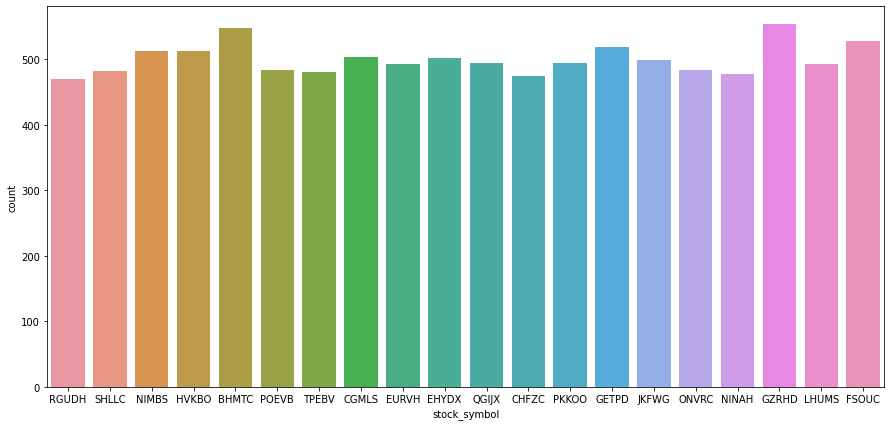

In [27]:
pl.figure(figsize=(15,7))
sns.countplot(x=df['stock_symbol'])
pl.show()

In [28]:
df.head()

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
0,0,280899,RGUDH,14,11,502,8924,2010-01-01,4479848
1,1,222892,SHLLC,10,1,632,324,2010-01-02,204768
2,2,987749,NIMBS,19,9,745,1349,2010-01-03,1005005
3,3,296858,HVKBO,17,5,852,359,2010-01-04,305868
4,4,644042,BHMTC,16,19,240,4969,2010-01-05,1192560


In [29]:
df.shape

(10000, 9)

In [30]:
df_buyer_= df[df['buyer_broker']>df['seller_broker']]
df_buyer_.head()

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
0,0,280899,RGUDH,14,11,502,8924,2010-01-01,4479848
1,1,222892,SHLLC,10,1,632,324,2010-01-02,204768
2,2,987749,NIMBS,19,9,745,1349,2010-01-03,1005005
3,3,296858,HVKBO,17,5,852,359,2010-01-04,305868
6,6,622041,BHMTC,8,7,658,3986,2010-01-07,2622788


# Top turnover

In [31]:
df_buyer_.groupby(['stock_symbol'])['amount'].sum().sort_values(ascending=False)

stock_symbol
BHMTC    740439726
GZRHD    692402705
TPEBV    671138470
EHYDX    658109175
QGIJX    657791904
RGUDH    648545383
EURVH    645765586
CHFZC    632405295
ONVRC    630915668
SHLLC    627722355
GETPD    624858227
JKFWG    611978577
HVKBO    607370543
PKKOO    589895801
POEVB    587642517
FSOUC    583950929
NINAH    573900783
NIMBS    554554621
CGMLS    541156108
LHUMS    510482146
Name: amount, dtype: int32

In [32]:
df_seller_= df[df['seller_broker']>df['buyer_broker']]
df_seller_.head()

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
4,4,644042,BHMTC,16,19,240,4969,2010-01-05,1192560
7,7,446064,SHLLC,2,3,169,7417,2010-01-08,1253473
12,12,426206,BHMTC,3,15,968,1439,2010-01-13,1392952
13,13,714556,POEVB,4,15,117,5096,2010-01-14,596232
14,14,584676,RGUDH,2,14,577,5436,2010-01-15,3136572


In [33]:
df_seller_.groupby(['stock_symbol'])['amount'].sum().sort_values(ascending=False)

stock_symbol
CGMLS    778478714
FSOUC    675924292
LHUMS    669515705
HVKBO    668027928
GETPD    662691482
NIMBS    657175863
GZRHD    656482761
BHMTC    632732973
POEVB    617466251
EURVH    615310376
SHLLC    596117688
PKKOO    595836248
JKFWG    592912161
EHYDX    581499461
RGUDH    576873005
NINAH    576452936
TPEBV    562429575
ONVRC    553652061
QGIJX    552434859
CHFZC    518924843
Name: amount, dtype: int32

In [34]:
df.head()

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
0,0,280899,RGUDH,14,11,502,8924,2010-01-01,4479848
1,1,222892,SHLLC,10,1,632,324,2010-01-02,204768
2,2,987749,NIMBS,19,9,745,1349,2010-01-03,1005005
3,3,296858,HVKBO,17,5,852,359,2010-01-04,305868
4,4,644042,BHMTC,16,19,240,4969,2010-01-05,1192560


# Top buyer broker

In [35]:
df.groupby('buyer_broker')['quantity'].sum().sort_values(ascending=False)

buyer_broker
5     302515
10    285061
19    282444
12    280293
6     279771
14    277267
1     277206
7     275333
2     273689
3     273146
17    272494
15    270935
18    269651
8     266925
16    262968
11    262715
13    255961
4     251051
9     248357
Name: quantity, dtype: int32

# topseller broker

In [36]:
df.groupby('seller_broker')['quantity'].sum().sort_values(ascending=False)

seller_broker
5     289003
4     285174
8     279681
16    278840
19    276848
15    275435
10    275152
1     273264
7     272717
3     270889
17    270557
13    270283
14    270083
18    268016
6     267561
11    265043
9     264138
12    258359
2     256739
Name: quantity, dtype: int32

In [37]:
df.head()

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
0,0,280899,RGUDH,14,11,502,8924,2010-01-01,4479848
1,1,222892,SHLLC,10,1,632,324,2010-01-02,204768
2,2,987749,NIMBS,19,9,745,1349,2010-01-03,1005005
3,3,296858,HVKBO,17,5,852,359,2010-01-04,305868
4,4,644042,BHMTC,16,19,240,4969,2010-01-05,1192560


In [38]:
grouped = df.groupby(['stock_symbol','buyer_broker'])['quantity'].sum().reset_index()
grouped

,stock_symbol,buyer_broker,quantity
0,BHMTC,1,13886
1,BHMTC,2,19150
2,BHMTC,3,16718
3,BHMTC,4,11915
4,BHMTC,5,17869
...,...,...,...
375,TPEBV,15,15947
376,TPEBV,16,16797
377,TPEBV,17,6510
378,TPEBV,18,15560


In [39]:
temp_df = pd.DataFrame()
for i in np.unique(grouped['stock_symbol']):
    temp=pd.DataFrame(grouped[grouped['stock_symbol']==i].sort_values('quantity',ascending=False).reset_index(drop=True).loc[0]).T
    temp_df = pd.concat([temp_df,temp]).sort_values('quantity',ascending=False).reset_index(drop = True)

## Top bought companies - High buying quantity of company stock (Single company)


In [40]:
temp_df[['stock_symbol','quantity']]

,stock_symbol,quantity
0,GETPD,23348
1,GZRHD,22207
2,LHUMS,21938
3,HVKBO,21004
4,BHMTC,20446
5,CGMLS,20337
6,EHYDX,20299
7,PKKOO,20130
8,POEVB,20038
9,NINAH,19836


## Top bought companies - High selling quantity of company stock (Single company)

In [41]:
grouped = df.groupby(['stock_symbol','seller_broker',])['quantity'].sum().reset_index()
temp_df = pd.DataFrame()
for i in np.unique(grouped['stock_symbol']):
    temp=pd.DataFrame(grouped[grouped['stock_symbol']==i].sort_values('quantity',ascending=False).reset_index(drop=True).loc[0]).T
    temp_df = pd.concat([temp_df,temp]).sort_values('quantity',ascending=False).reset_index(drop = True)

In [42]:
temp_df[['stock_symbol','quantity']]

,stock_symbol,quantity
0,JKFWG,23999
1,SHLLC,22048
2,RGUDH,21869
3,FSOUC,21268
4,CHFZC,21164
5,GZRHD,21063
6,HVKBO,20730
7,BHMTC,20474
8,CGMLS,20034
9,LHUMS,19830


In [43]:
pivot = pd.pivot_table(data = df,
              columns="stock_symbol",
               index = "buyer_broker",
               values = "quantity",
               aggfunc= "sum"
              )


In [44]:
grouped = df.groupby(['seller_broker','stock_symbol'])['quantity'].sum().reset_index()
temp_df = pd.DataFrame()
for i in np.unique(grouped['seller_broker']):
    temp=pd.DataFrame(grouped[grouped['seller_broker']==i].sort_values('quantity',ascending=False).reset_index(drop=True).loc[0]).T
    temp_df = pd.concat([temp_df,temp]).sort_values('quantity',ascending=False).reset_index(drop = True)

# Top broker top sell

In [45]:
temp_df

,seller_broker,stock_symbol,quantity
0,9,JKFWG,23999
1,2,SHLLC,22048
2,5,FSOUC,21268
3,8,CHFZC,21164
4,12,GZRHD,21063
5,11,HVKBO,20730
6,19,FSOUC,20487
7,10,BHMTC,20474
8,16,CGMLS,20034
9,15,JKFWG,19777


In [46]:
grouped = df.groupby(['buyer_broker','stock_symbol'])['quantity'].sum().reset_index()
temp_df = pd.DataFrame()
for i in np.unique(grouped['buyer_broker']):
    temp=pd.DataFrame(grouped[grouped['buyer_broker']==i].sort_values('quantity',ascending=False).reset_index(drop=True).loc[0]).T
    temp_df = pd.concat([temp_df,temp]).sort_values('quantity',ascending=False).reset_index(drop = True)


# TOP broker top buy

In [47]:
temp_df

,buyer_broker,stock_symbol,quantity
0,14,GETPD,23348
1,12,GZRHD,22207
2,8,GZRHD,22094
3,6,LHUMS,21938
4,10,GETPD,21565
5,3,HVKBO,21004
6,19,BHMTC,20380
7,5,POEVB,20038
8,2,EHYDX,20012
9,17,EURVH,18895


# Top broker top buy with broker_id filters

In [48]:
broker_id = 1

In [51]:
temp_df=df[df['buyer_broker']==broker_id].copy()
temp_df.head()

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
23,23,576667,HVKBO,1,19,712,2078,2010-01-24,1479536
38,38,456256,NIMBS,1,2,341,3647,2010-02-11,1243627
48,48,710692,HVKBO,1,8,859,5347,2010-02-21,4593073
50,50,394569,PKKOO,1,4,421,6019,2010-02-23,2533999
90,90,286784,GZRHD,1,8,928,5254,2010-04-07,4875712


In [55]:
df_temp=temp_df.groupby('stock_symbol')['quantity'].sum().sort_values(ascending=False).reset_index()
df_temp['%weight']= df_temp['quantity']/sum(df_temp['quantity'])